# <h1><center>FLIGHT FARE PREDICTION </center></h1>
***
### <h3 align="right">Authors:<br> J Prince Kelvin <br> Sandra V<br> Sreerang R<br></h3>

## Problem Statement - 
### <center><i>The objective of this notebook is to predict the fares of the flights based on different factors available in the provided dataset.</i></center>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
print("Successfully Imported")

Successfully Imported


### Importing DataSet

In [2]:
train_data=pd.read_csv("prepocessedData/preprocessedtraindata.csv")

In [3]:
train_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,1,5,5,50,13,15,7,25,0,...,0,1,0,1,0,0,0,0,0,7662
2,2,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,13882
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,1,0,0,0,0,0,6218
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,13302


In [6]:
test_data = pd.read_csv('prepocessedData/preprocessedtestdata.csv')

In [7]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,...,Chennai,Delhi,Kolkata,Mumbai,Banglore.1,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,...,0,0,0,0,0,0,1,0,0,0


In [9]:
X=train_data.drop(['Price'],axis=1)
y=train_data['Price']

## Model Training

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
y_pred = reg.predict(X_test)

In [13]:
reg.score(X_train, y_train)

0.9528913804486248

In [14]:
reg.score(X_test, y_test)

0.7970558205465409

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

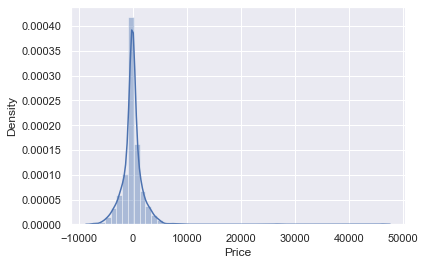

In [15]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

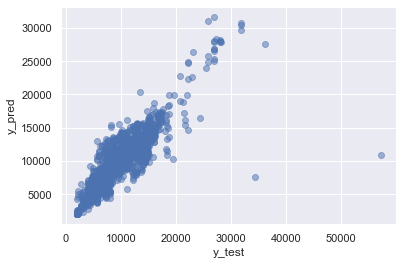

In [16]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1176.6690012905776
MSE: 4375893.828036282
RMSE: 2091.863721191293


In [18]:
# RMSE/(max(DV)-min(DV))
2090.417782403133/(max(y)-min(y))

0.026885364968594564

In [19]:
metrics.r2_score(y_test, y_pred)

0.7970558205465409

***

## Hyperparameter Tuning

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [22]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [23]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [24]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [26]:
prediction = rf_random.predict(X_test)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

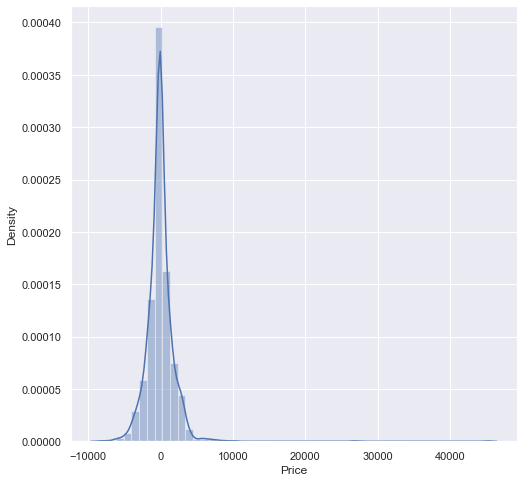

In [27]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)

Text(0, 0.5, 'y_pred')

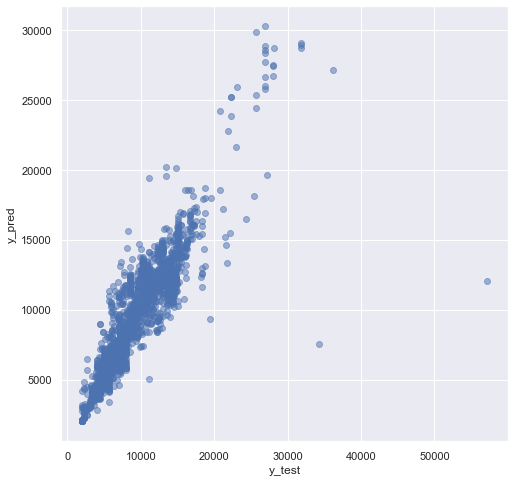

In [28]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1166.5329313622592
MSE: 4056395.918273833
RMSE: 2014.0496315319126


# Saving the model

In [30]:
import pickle
# open a file, where you want to store the data
file = open('flight_price_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)

In [31]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [32]:
y_prediction = forest.predict(X_test)

In [33]:
metrics.r2_score(y_test, y_prediction)

0.7970558205465409

---